# Milestone #1 - Varan Satchi

__Proposal__: Analyze ~ three million Russian troll tweets

__Data Source__: https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/

__Goals:__ Use EDA to create some unique geopolitical analysis, build a model that can predict account type, do a cluster model, and build a Markov Chain troll tweet generator.

__Proposed Methods and Models / Risks / Assumptions / Goals__:
1. Basic Idea: Supervised classification of account_type using NLP vectorizer methods and a model pipeline
2. Advanced Ideas: In an ideal world, I'd like to incorporate some more advanced concepts. At this point, I'm considering some unsupervised learning method - like clustering - or using neural networks
3. I'm relying heavily on the previous due dilligence of the researchers at Clemson University and the editors at FiveThirtyEight, as I've taken the data directly from them (as opposed to scraping via Twitter API). I feel this is not a huge risk / assumption, as both parties are extremely sophisticated
4. I wonder if imbalanced classes will be an issue moving forward, as the account types are quite disparate in terms of distribution
5. The overall goal of this capstone is to gain an understanding of online politics / astroturfing
    - the specific goal, at this point, is to effectivley classify Russian internet trolls 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# loading in the 13 CSVs
df1 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_1.csv')
df2 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_2.csv')
df3 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_3.csv')
df4 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_4.csv')
df5 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_5.csv')
df6 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_6.csv')
df7 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_7.csv')
df8 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_8.csv')
df9 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_9.csv')
df10 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_10.csv')
df11 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_11.csv')
df12 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_12.csv')
df13 = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_13.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.sample() # seems legit

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
49859,893000000000000000,ALANISSTRS,TheTerroryzing1 blanken01 LauraLoomer POTUS re...,Unknown,English,8/12/2017 19:24,8/12/2017 19:24,9,5,1047,...,Right,0,RightTroll,0,893391276942426112,896452339787235332,http://twitter.com/893391276942426112/statuses...,https://twitter.com/i/web/status/8964514562823...,NaN,NaN


In [4]:
# going to combine these dataframes together for ease of use
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

In [5]:
master = pd.concat(frames)

In [6]:
master.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [7]:
master.sample(5)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
64814,1914760610,RAVENICHOLSON,IMG 0977: https://t.co/7wIttTkge9 via @YouTube,United States,English,4/21/2017 23:04,4/21/2017 23:04,837,799,5119,...,Left,1,LeftTroll,0,1914760610,855557826093166593,http://twitter.com/1914760610/statuses/8555578...,http://youtu.be/QSTXVzvCkGE?a,NaN,NaN
135939,2260605925,SVETLANKAZZZZZ,Кол-ство заключённых на 100 000 человек населе...,United States,Russian,12/26/2015 18:53,12/26/2015 18:53,182,3704,3649,...,Russian,1,NonEnglish,1,2260605925,680823828172390400,http://twitter.com/SvetlankaZZzzz/statuses/680...,http://vk.cc/4zXrLG,NaN,NaN
156825,2492948562,JADONHUTCHINSON,"Poor training, chaotic police dept. outlined i...",United States,English,5/15/2016 13:29,5/15/2016 13:29,293,356,976,...,Left,1,LeftTroll,0,2492948562,731838974478573568,http://twitter.com/JadonHutchinson/statuses/73...,https://twitter.com/TheRoot/status/73183184359...,http://buff.ly/1Xc5Ax4,NaN
179632,2246787642,D_A_S_H_AAA,Германия готова отправить спецназ для освободи...,Russian Federation,Russian,12/5/2015 12:13,12/5/2015 12:13,964,255,2491,...,Russian,1,NonEnglish,1,2246787642,673112964082331648,http://twitter.com/d_a_s_h_aaa/statuses/673112...,http://bit.ly/1XQ90ms,NaN,NaN
91781,2547141851,CHICAGODAILYNEW,Basquiat painting of skull sells for record $1...,United States,English,5/19/2017 6:18,5/19/2017 6:18,11656,21438,50083,...,local,0,NewsFeed,0,2547141851,865451570074341379,http://twitter.com/2547141851/statuses/8654515...,https://twitter.com/ChicagoDailyNew/status/865...,http://www.chicagotribune.com/ct-jean-michel-b...,NaN


In [8]:
master.shape

(2946207, 21)

In [16]:
master.isnull().sum()[master.isnull().sum() != 0]
# Unsurprised by this result, considering not every tweet will have a region, link etc. attached

content             1
region           8818
post_type     1648625
tco1_step1     845971
tco2_step1    2235090
tco3_step1    2931207
dtype: int64

In [10]:
# Dealing with non-English tweets, while interesting, is beyond my linguistic capabilities!
mask = master['language'] == 'English'
eng = master[mask]

In [11]:
# just checking!
eng[eng['language'] != 'English']

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1


In [12]:
eng.shape # still have a massive number of tweets

(2116867, 21)

In [33]:
# as this is a potential target variable, I want to examine it a bit closer
master.account_type.unique()

array(['Right', 'Russian', 'Koch', 'Italian', 'Left', '?', 'German',
       'Spanish', 'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'Ukranian', 'ZAPOROSHIA', 'news', 'Uzbek', 'Ebola ', 'Portuguese'],
      dtype=object)

In [34]:
master.groupby('account_type').nunique()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
account_type,,,,,,,,,,,,,,,,,,,,,
?,165,211,12841,13,36,9622,8134,708,1099,7136,...,1,2,1,2,212,13539,13539,9356,559,14
Arabic,30,30,6215,8,16,5876,5807,1215,1335,5197,...,1,2,1,2,30,6228,6228,4429,1675,1
Commercial,9,6,121677,2,56,61373,61062,281,792,59703,...,1,2,1,1,9,121904,121904,103749,10301,1
Ebola,2,2,66,1,2,71,71,3,2,69,...,1,1,1,1,2,71,71,2,0,0
French,3,11,977,3,9,944,949,113,62,887,...,1,2,1,1,11,1117,1117,921,23,0
German,81,128,80709,8,40,67606,67938,4077,3740,23398,...,1,2,1,2,131,91511,91511,72705,45673,21
Hashtager,114,112,112930,4,45,48518,49709,7712,10165,26629,...,1,2,1,2,114,241786,241786,23386,802,45
Italian,6,9,14860,2,25,11848,12110,95,104,3844,...,1,2,1,2,10,15680,15680,14043,4615,20
Koch,122,121,8662,3,28,2954,3013,127,81,631,...,1,2,1,2,121,10894,10894,1077,116,3


In [35]:
master['account_type'].value_counts()

Right         711668
Russian       704917
local         459220
Left          427141
Hashtager     241786
news          139006
Commercial    121904
German         91511
Italian        15680
?              13539
Koch           10894
Arabic          6228
Spanish         1226
French          1117
ZAPOROSHIA       175
Portuguese       118
Ebola             71
Ukranian           4
Uzbek              2
Name: account_type, dtype: int64

### Regional Analysis

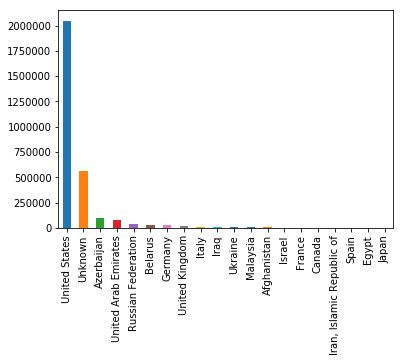

In [19]:
master['region'].value_counts()[:20]
master['region'].value_counts()[:20].plot(kind="bar")

### Language Analysis

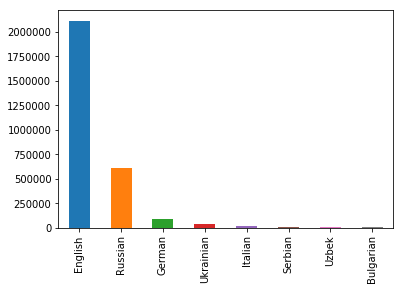

In [29]:
master['language'].value_counts()[:8]
master['language'].value_counts()[:8].plot(kind="bar")

### Account Type Breakdown

NonEnglish      820803
RightTroll      711668
NewsFeed        598226
LeftTroll       427141
HashtagGamer    241786
Name: account_category, dtype: int64


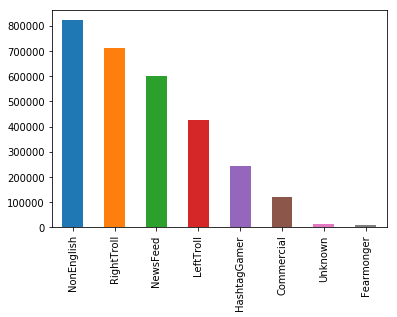

In [32]:
print(master['account_category'].value_counts()[:5])
master['account_category'].value_counts().plot(kind="bar")

### Markov Chain

In [39]:
# FOUND THIS CODE ONLINE - will attribute source later
# a list of all words in the dataset tweets, words are in lowercase
words=[]
for row in eng['content']:
    for word in str(row).split():
        words.append(word.lower())

chain={}
index=1
# building a markov chain
for word in words[index:]:
    key=words[index-1]
    if key in chain:
        # setdefault appends the existing list in the dictionary, or creates an empty list if there is no preexiting list
        chain.setdefault(key, []).append(word)
        # chain[key].append(word)
    else:   
        chain[key]=[word]
    index=index+1
# generating sentence with markov chain
firstword=np.random.choice(list(chain.keys()))
message=firstword.capitalize()

while len(message.split(' '))<25:
    nextword = np.random.choice(chain[firstword])
    firstword=nextword
    message=message+" "+nextword

print(message)

Https://t.co/m6wrutk4l8 hockey police officer #shoots, kills girlfriend then smile :) have been in wall cd duplication, graphics, cd in seth rich in their base, all


In [42]:
#!pip install mpl_toolkits.basemap

  Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: )
No matching distribution found for mpl_toolkits.basemap
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
